Linear

In [55]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Linear_ax
from data_generator import gendata_Deep_mixG
from data_generator import gendata_Deep
from data_generator import gendata_Deep_size
from data_generator import gendata_Deep_ax
import torch
# from log_hazard_binary import g_dnn_bin
# from log_linear_binary import E_ols_bin
# from optITR import optITR_lin_bin
from itrtest import hetero_test_bin
patiences = [30,30]
n_node = [64,64]
n_layer = [1,1]
t_nodes = 100
t_fig = 50
n_lr = [5e-4,5e-4]
n_epoch = [100,100]
# s_k = 0.1*np.arange(100)
seed = 42
rho1 = 0; rho2 = 0
loop = 500
decision = np.zeros(loop)
p_value_record = np.zeros(loop)
Un_record = np.zeros(loop)
Tn_record = np.zeros(loop)
sigma_record = np.zeros(loop)
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
beta = np.array([1,0.5,1,0,-0.5])
gamma = np.array([0,-0.5,-0.5,1,1])

set_seed(114)
test_data = gendata_Linear_ax(500, 0.5, beta, gamma, rho=0) # no use
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
# set_seed(114)
# test_data = gendata_Linear(500, 0.5,beta,gamma,pat=1)

for i in range(loop):
    set_seed(1999+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear_ax(200, 0.5, beta, gamma, rho=0)
    train_data = gendata_Linear_ax(800, 0.5, beta, gamma, rho=0)
    s_k = np.linspace(start=0, stop=np.floor(np.max(train_data['R']))+1,num=100)
    res = hetero_test_bin(train_data, val_data, test_data,\
                       t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch,\
                          patiences,rho1=rho1,rho2=rho2,seed=seed,\
                              show_val =False, n_points=100, alpha=0.05)
    print(f"Decision: {res['decision']}, p_value: {res['p_value']}")
    decision[i] = res['decision']
    p_value_record[i] = res['p_value']
    Un_record[i] = res['U_n']
    Tn_record[i] = res['statistic']
    sigma_record[i] = res['sigma_Tn_h']

print('Result show:       ')
print(f"Tn: {Tn_record}")
print(f"Sigma: {sigma_record}")
print(f"Decision: {np.mean(decision)}")
print(f"p_value: {np.mean(p_value_record)}")


Decision: 0, p_value: 0.3026852177156848
Decision: 0, p_value: 0.126742518488837
Decision: 0, p_value: 0.14054669171506284
Decision: 0, p_value: 0.7878019858300773
Decision: 0, p_value: 0.19677849217278753
Decision: 0, p_value: 0.9768385006764442
Decision: 0, p_value: 0.7043275663836808
Decision: 0, p_value: 0.9056003390601882
Decision: 0, p_value: 0.8291830810208516
Decision: 0, p_value: 0.1752395202640752
Decision: 0, p_value: 0.7011319122713509
Decision: 0, p_value: 0.837602280672662
Decision: 1, p_value: 0.033851063209732336
Decision: 0, p_value: 0.12469368328316803
Decision: 0, p_value: 0.6915110081367206
Decision: 0, p_value: 0.3171847477455808
Decision: 1, p_value: 0.03303876337336847
Decision: 0, p_value: 0.7418750384535097
Decision: 0, p_value: 0.12827295604029168
Decision: 1, p_value: 0.036329509142369425
Decision: 0, p_value: 0.8405405682684826
Decision: 0, p_value: 0.255193618751698
Decision: 0, p_value: 0.06225082983923207
Decision: 0, p_value: 0.5134115676783515
Decision:

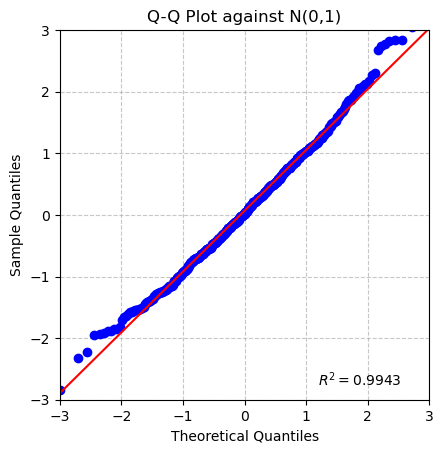

Slope: 0.9876, Intercept: 0.0681


In [56]:
from scipy import stats
Un_record = Tn_record/sigma_record
figL1k, axL1k = plt.subplots()
stats.probplot(Un_record, dist="norm", plot=axL1k,rvalue=True,fit=True)
axL1k.set_xlim(-3,3)
axL1k.set_ylim(-3,3)
axL1k.set_aspect('equal')
axL1k.grid(True,linestyle='--',alpha=0.7)
axL1k.set_title("Q-Q Plot against N(0,1)")
axL1k.set_xlabel("Theoretical Quantiles")
axL1k.set_ylabel("Sample Quantiles")
plt.show()
line = axL1k.get_lines()[1]
x_data = line.get_xdata()
y_data = line.get_ydata()
slope = (y_data[-1]-y_data[0])/(x_data[-1]-x_data[0])
intercept = y_data[0]-slope*x_data[0]
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")

In [57]:
size_ahl1 = {'Tn':Tn_record, 'sigma':sigma_record, 'Un':Un_record, 'p_value':p_value_record,'decision':decision}
np.save('AHL1_size.npy',size_ahl1,allow_pickle=True)
# load_ahl1 = np.load('AHL1_size.npy',allow_pickle=True).item()
# print(load_ahl1)

In [58]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Linear_ax
from data_generator import gendata_Deep_mixG
from data_generator import gendata_Deep
from data_generator import gendata_Deep_size
from data_generator import gendata_Deep_ax
import torch
# from log_hazard_binary import g_dnn_bin
# from log_linear_binary import E_ols_bin
# from optITR import optITR_lin_bin
from itrtest import hetero_test_bin
patiences = [30,30]
n_node = [64,64]
n_layer = [1,1]
t_nodes = 100
t_fig = 50
n_lr = [6e-4,6e-4]
n_epoch = [100,100]
# s_k = 0.1*np.arange(100)
seed = 42
rho1 = 0; rho2 = 0
loop = 500
decision = np.zeros(loop)
p_value_record = np.zeros(loop)
Un_record = np.zeros(loop)
Tn_record = np.zeros(loop)
sigma_record = np.zeros(loop)
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
beta = np.array([1,0.5,1,0,-0.5])
gamma = np.array([0,-0.5,-0.5,1,1])

set_seed(114)
test_data = gendata_Linear_ax(500, 0.5, beta, gamma, rho=0) # no use
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
# set_seed(114)
# test_data = gendata_Linear(500, 0.5,beta,gamma,pat=1)

for i in range(loop):
    set_seed(1999+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear_ax(400, 0.5, beta, gamma, rho=0)
    train_data = gendata_Linear_ax(1600, 0.5, beta, gamma, rho=0)
    s_k = np.linspace(start=0, stop=np.floor(np.max(train_data['R']))+1,num=100)
    res = hetero_test_bin(train_data, val_data, test_data,\
                       t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch,\
                          patiences,rho1=rho1,rho2=rho2,seed=seed,\
                              show_val =False, n_points=100, alpha=0.05)
    print(f"Decision: {res['decision']}, p_value: {res['p_value']}")
    decision[i] = res['decision']
    p_value_record[i] = res['p_value']
    Un_record[i] = res['U_n']
    Tn_record[i] = res['statistic']
    sigma_record[i] = res['sigma_Tn_h']

print('Result show:       ')
print(f"Tn: {Tn_record}")
print(f"Sigma: {sigma_record}")
print(f"Decision: {np.mean(decision)}")
print(f"p_value: {np.mean(p_value_record)}")


Decision: 0, p_value: 0.3376656694702581
Decision: 0, p_value: 0.8051667961912963
Decision: 0, p_value: 0.37823753786497927
Decision: 0, p_value: 0.7435899827845767
Decision: 0, p_value: 0.5737397049837811
Decision: 0, p_value: 0.3951453618624241
Decision: 0, p_value: 0.5832321633814561
Decision: 0, p_value: 0.10512602218201597
Decision: 0, p_value: 0.18659057836040005
Decision: 0, p_value: 0.8550575112917969
Decision: 1, p_value: 0.03517854086937711
Decision: 0, p_value: 0.6341595751889957
Decision: 0, p_value: 0.12337133301140218
Decision: 0, p_value: 0.16344001246417883
Decision: 1, p_value: 0.03849983556894875
Decision: 1, p_value: 0.015438091572409983
Decision: 0, p_value: 0.9650977657011436
Decision: 0, p_value: 0.6412437554189119
Decision: 0, p_value: 0.14174224507024458
Decision: 1, p_value: 0.0019430542504441787
Decision: 0, p_value: 0.6502706891906331
Decision: 0, p_value: 0.9324888123278593
Decision: 0, p_value: 0.08817700557710505
Decision: 0, p_value: 0.2995859242701847
De

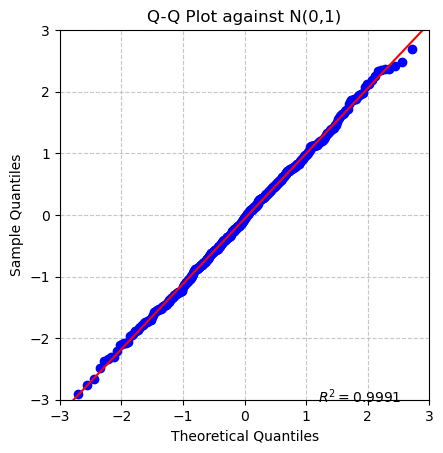

Slope: 1.0587, Intercept: -0.0615


In [59]:
Un_record = Tn_record/sigma_record
figL2k, axL2k = plt.subplots()
stats.probplot(Un_record, dist="norm", plot=axL2k,rvalue=True,fit=True)
axL2k.set_xlim(-3,3)
axL2k.set_ylim(-3,3)
axL2k.set_aspect('equal')
axL2k.grid(True,linestyle='--',alpha=0.7)
axL2k.set_title("Q-Q Plot against N(0,1)")
axL2k.set_xlabel("Theoretical Quantiles")
axL2k.set_ylabel("Sample Quantiles")
plt.show()
line = axL2k.get_lines()[1]
x_data = line.get_xdata()
y_data = line.get_ydata()
slope = (y_data[-1]-y_data[0])/(x_data[-1]-x_data[0])
intercept = y_data[0]-slope*x_data[0]
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")

In [60]:
size_ahl2 = {'Tn':Tn_record, 'sigma':sigma_record, 'Un':Un_record, 'p_value':p_value_record,'decision':decision}
np.save('AHL2_size.npy',size_ahl2,allow_pickle=True)
# load_ahl2 = np.load('AHL2_size.npy',allow_pickle=True).item()
# print(load_ahl2)

Deep

In [52]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep_mixG
from data_generator import gendata_Deep
from data_generator import gendata_Deep_size
from data_generator import gendata_Deep_ax
import torch
# from log_hazard_binary import g_dnn_bin
# from log_linear_binary import E_ols_bin
# from optITR import optITR_lin_bin
from itrtest import hetero_test_bin
patiences = [30,30]
n_node = [64,64]
n_layer = [1,1]
t_nodes = 100
t_fig = 50
n_lr = [6e-4,6e-4]
n_epoch = [100,100]
# s_k = 0.1*np.arange(100)
seed = 42
rho1 = 0; rho2 = 0
loop = 500
decision = np.zeros(loop)
p_value_record = np.zeros(loop)
Un_record = np.zeros(loop)
Tn_record = np.zeros(loop)
sigma_record = np.zeros(loop)


set_seed(114)
test_data = gendata_Deep_ax(500, 0.5, rho=0) # no use
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
# set_seed(114)
# test_data = gendata_Linear(500, 0.5,beta,gamma,pat=1)

for i in range(loop):
    set_seed(1999+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Deep_ax(200, 0.5, rho=0)
    train_data = gendata_Deep_ax(800, 0.5, rho=0)
    s_k = np.linspace(start=0, stop=np.floor(np.max(train_data['R']))+1,num=100)
    res = hetero_test_bin(train_data, val_data, test_data,\
                       t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch,\
                          patiences,rho1=rho1,rho2=rho2,seed=seed,\
                              show_val =False, n_points=100, alpha=0.05)
    print(f"Decision: {res['decision']}, p_value: {res['p_value']}")
    decision[i] = res['decision']
    p_value_record[i] = res['p_value']
    Un_record[i] = res['U_n']
    Tn_record[i] = res['statistic']
    sigma_record[i] = res['sigma_Tn_h']

print('Result show:       ')
print(f"Tn: {Tn_record}")
print(f"sigma: {sigma_record}")
print(f"Decision: {np.mean(decision)}")
print(f"p_value: {np.mean(p_value_record)}")
# print(f"Phi_mean: {res['Phi_mean']}")
# print(f"Phi_A_mean: {res['Phi_A_mean']}")


Decision: 0, p_value: 0.8686103939293752
Decision: 0, p_value: 0.2065954883282165
Decision: 0, p_value: 0.21495990037563983
Decision: 0, p_value: 0.5202643533919966
Decision: 0, p_value: 0.3311200812478252
Decision: 0, p_value: 0.9852076458920089
Decision: 0, p_value: 0.9945574254580646
Decision: 0, p_value: 0.7560694046159626
Decision: 0, p_value: 0.9311513735024991
Decision: 0, p_value: 0.19967884763170818
Decision: 0, p_value: 0.7106603808051535
Decision: 0, p_value: 0.48359071637712614
Decision: 1, p_value: 0.044100342151728616
Decision: 0, p_value: 0.0897103318491314
Decision: 0, p_value: 0.795801759472145
Decision: 0, p_value: 0.3896944663324785
Decision: 0, p_value: 0.08550365656879083
Decision: 0, p_value: 0.9993608211506936
Decision: 0, p_value: 0.26864118094404066
Decision: 1, p_value: 0.0036439225102191768
Decision: 0, p_value: 0.6617867507961284
Decision: 0, p_value: 0.34064213710361857
Decision: 0, p_value: 0.1989793507132579
Decision: 0, p_value: 0.21270961837893276
Decis

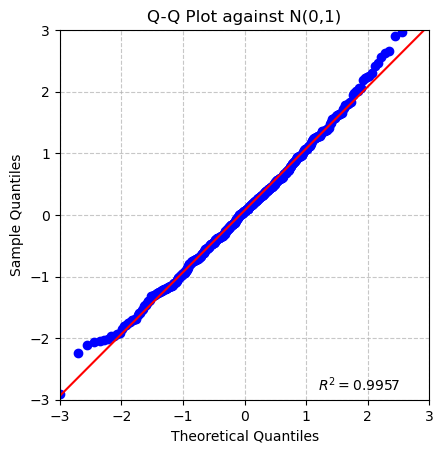

Slope: 1.0041, Intercept: 0.0739


In [53]:
Un_record = Tn_record/sigma_record
figD1k, axD1k = plt.subplots()
stats.probplot(Un_record, dist="norm", plot=axD1k,rvalue=True,fit=True)
axD1k.set_xlim(-3,3)
axD1k.set_ylim(-3,3)
axD1k.set_aspect('equal')
axD1k.grid(True,linestyle='--',alpha=0.7)
axD1k.set_title("Q-Q Plot against N(0,1)")
axD1k.set_xlabel("Theoretical Quantiles")
axD1k.set_ylabel("Sample Quantiles")
plt.show()
line = axD1k.get_lines()[1]
x_data = line.get_xdata()
y_data = line.get_ydata()
slope = (y_data[-1]-y_data[0])/(x_data[-1]-x_data[0])
intercept = y_data[0]-slope*x_data[0]
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")

In [54]:
size_ahd1 = {'Tn':Tn_record, 'sigma':sigma_record, 'Un':Un_record, 'p_value':p_value_record,'decision':decision}
np.save('AHD1_size.npy',size_ahd1,allow_pickle=True)
# load_ahd1 = np.load('AHD1_size.npy',allow_pickle=True).item()
# print(load_ahd1)

In [47]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep_mixG
from data_generator import gendata_Deep
from data_generator import gendata_Deep_size
from data_generator import gendata_Deep_ax
import torch
# from log_hazard_binary import g_dnn_bin
# from log_linear_binary import E_ols_bin
# from optITR import optITR_lin_bin
from itrtest import hetero_test_bin
patiences = [30,30]
n_node = [64,64]
n_layer = [1,1]
t_nodes = 100
t_fig = 50
n_lr = [5e-4,5e-4]
n_epoch = [100,100]
# s_k = 0.1*np.arange(100)
seed = 42
rho1 = 0; rho2 = 0
loop = 500
decision = np.zeros(loop)
p_value_record = np.zeros(loop)
Un_record = np.zeros(loop)
Tn_record = np.zeros(loop)
sigma_record = np.zeros(loop)


set_seed(114)
test_data = gendata_Deep_ax(500, 0.5, rho=0) # no use
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
# set_seed(114)
# test_data = gendata_Linear(500, 0.5,beta,gamma,pat=1)

for i in range(loop):
    set_seed(1999+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Deep_ax(400, 0.5, rho=0)
    train_data = gendata_Deep_ax(1600, 0.5, rho=0)
    s_k = np.linspace(start=0, stop=np.floor(np.max(train_data['R']))+1,num=100)
    res =hetero_test_bin(train_data, val_data, test_data,\
                       t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch,\
                          patiences,rho1=rho1,rho2=rho2,seed=seed,\
                              show_val =False, n_points=100, alpha=0.05)
    print(f"Decision: {res['decision']}, p_value: {res['p_value']}")
    decision[i] = res['decision']
    p_value_record[i] = res['p_value']
    Un_record[i] = res['U_n']
    Tn_record[i] = res['statistic']
    sigma_record[i] = res['sigma_Tn_h']

print('Result show:       ')
print(f"Tn: {Tn_record}")
print(f"sigma: {sigma_record}")
print(f"Decision: {np.mean(decision)}")
print(f"p_value: {np.mean(p_value_record)}")
# print(f"Phi_mean: {res['Phi_mean']}")
# print(f"Phi_A_mean: {res['Phi_A_mean']}")


Decision: 0, p_value: 0.6359137977362588
Decision: 0, p_value: 0.9230298183107125
Decision: 0, p_value: 0.11856661188976426
Decision: 0, p_value: 0.8757830535656552
Decision: 0, p_value: 0.8446305729502742
Decision: 0, p_value: 0.8670390331535953
Decision: 0, p_value: 0.8063620183083706
Decision: 0, p_value: 0.10914331346052857
Decision: 0, p_value: 0.15439150041641253
Decision: 0, p_value: 0.6584892194302707
Decision: 0, p_value: 0.06661001233787546
Decision: 0, p_value: 0.47372898678758446
Decision: 0, p_value: 0.4008032457156483
Decision: 0, p_value: 0.385289685953189
Decision: 1, p_value: 0.04497878195826243
Decision: 1, p_value: 0.011699958384783654
Decision: 0, p_value: 0.5010516212180794
Decision: 0, p_value: 0.4592205357070971
Decision: 0, p_value: 0.5591069987894677
Decision: 1, p_value: 0.020814868403200862
Decision: 0, p_value: 0.5085550065809741
Decision: 0, p_value: 0.8034988538056265
Decision: 0, p_value: 0.135862474700728
Decision: 0, p_value: 0.3968315374370438
Decision

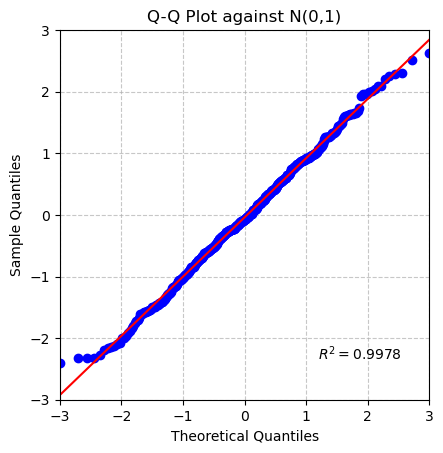

Slope: 0.9618, Intercept: -0.0397


In [49]:
Un_record = Tn_record/sigma_record
figD2k, axD2k = plt.subplots()
stats.probplot(Un_record, dist="norm", plot=axD2k,rvalue=True,fit=True)
axD2k.set_xlim(-3,3)
axD2k.set_ylim(-3,3)
axD2k.set_aspect('equal')
axD2k.grid(True,linestyle='--',alpha=0.7)
axD2k.set_title("Q-Q Plot against N(0,1)")
axD2k.set_xlabel("Theoretical Quantiles")
axD2k.set_ylabel("Sample Quantiles")
plt.show()
line = axD2k.get_lines()[1]
x_data = line.get_xdata()
y_data = line.get_ydata()
slope = (y_data[-1]-y_data[0])/(x_data[-1]-x_data[0])
intercept = y_data[0]-slope*x_data[0]
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")

In [ ]:
size_ahd2 = {'Tn':Tn_record, 'sigma':sigma_record, 'Un':Un_record, 'p_value':p_value_record,'decision':decision}
np.save('AHD2_size.npy',size_ahd2,allow_pickle=True)
# load_ahd2 = np.load('AHD2_size.npy',allow_pickle=True).item()
# print(load_ahd2)